In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

# Main Comments
The derivative converges well for n = 0 and n = 4, but for n = 2 the derivative converges on the interval with the step size larger than expected (as compared to Vera and Kimberly's paper). For n = 6 case I was not able to find convergence interval (see below).

In [2]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.cmb_lensing
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt
default_color_list = ['#1A1A1A', '#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442', '#56B4E9']

In [3]:
# create an Observables object to store information for derivatives
pars = np.array( ['omega_b', 'omega_dmeff', 'h',  'A_s', 'n_s', 'tau_reio', 'sigma_dmeff'])
centers = np.array([0.02222,  0.1197,  0.69,  2.1955e-9, 0.9655, 0.06, 0.0])
nparams = len(pars)

# generate a template CLASS python wrapper configuration
classy_template = {  'output': 'tCl,pCl,lCl,mPk',
                'l_max_scalars': 5000,
                'lensing': 'yes',
                'omega_cdm':1e-22,
                   
                'm_dmeff':1,
                'npow_dmeff' : 0,
                   
                'tight_coupling_trigger_tau_c_over_tau_k':0.,
                'tight_coupling_trigger_tau_c_over_tau_h':0.,
                'reionization_optical_depth_tol': 1e-07,
                'tol_background_integration': 1e-8,
                'tol_perturb_integration': 1e-8,
                'tol_thermo_integration': 1e-9,
                'perturb_sampling_stepsize':0.01,
                'k_max_tau0_over_l_max' : 6,
                'P_k_max_h/Mpc' : 5.,
                'gauge' : 'synchronous',
                'k_per_decade_for_pk' : 100 }

left_steps = np.array([0.0008, 0.003,   0.02,   0.1e-9, 0.01, 0.02, 0.0])
right_steps = np.array([0.0008, 0.003,   0.02,   0.1e-9, 0.01, 0.02, 1e-29])

obs = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-left_steps,
                  right=centers+right_steps)

# add in the fiducial values too
classy_template.update(dict(zip(obs.parameters, obs.fiducial)))

In [4]:
# generate the fiducial cosmology
obs.compute_cosmo(key='fiducial',
                  classy_dict=classy_template)

## 1 MeV, n=0
The derivative converges in the interval [1e-29, 1e-28] (first cell). If we choose smaller step size, the derivative starts oscillating (second cell). If we choose larger step size, the derivative starts to deiverge (last two cells).

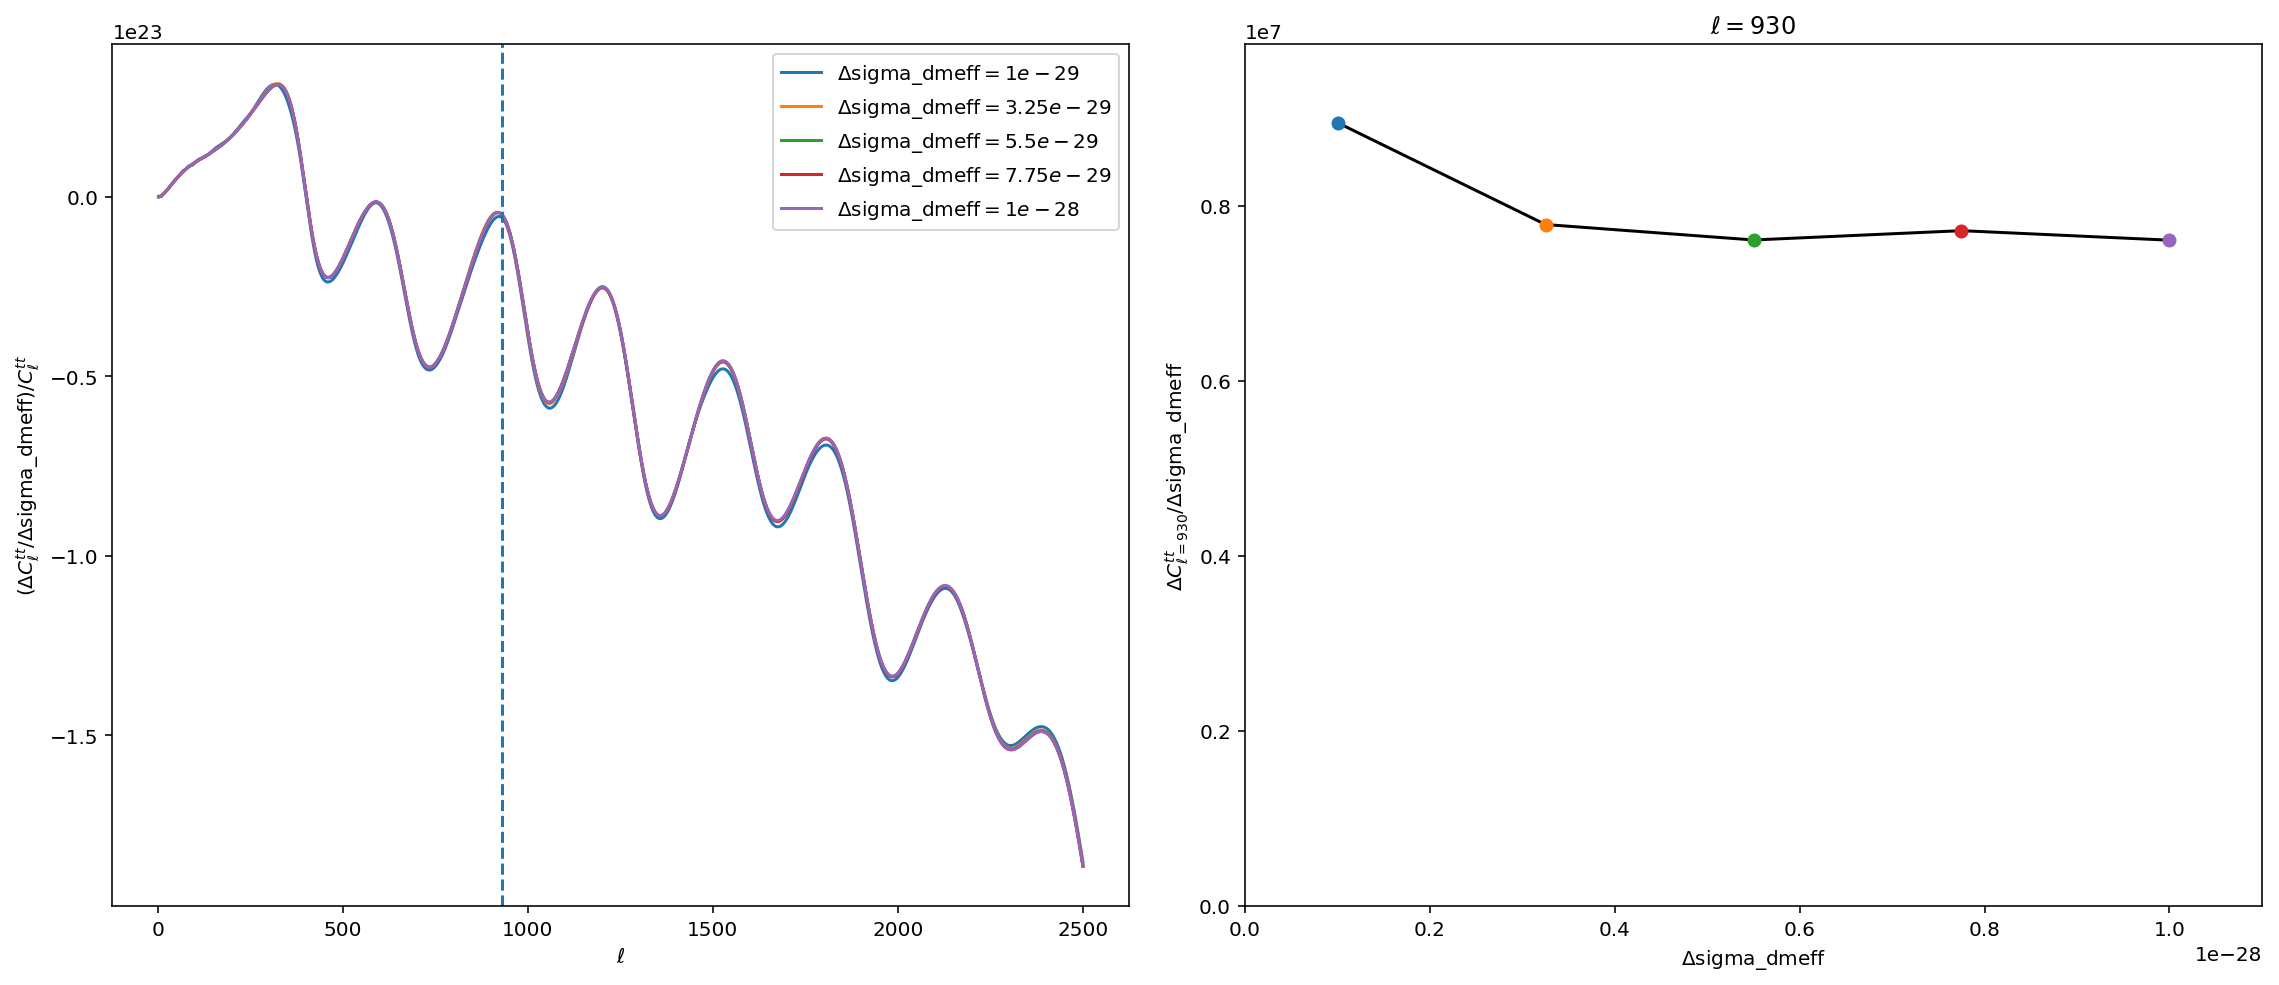

In [5]:
# probably the best step size
classy_template['m_dmeff'] = 1e-3
classy_template['npow_dmeff'] = 0
# change the size
# in paper 2.6e-26
# in my JP 6.57e-27
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-29, 1e-28, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

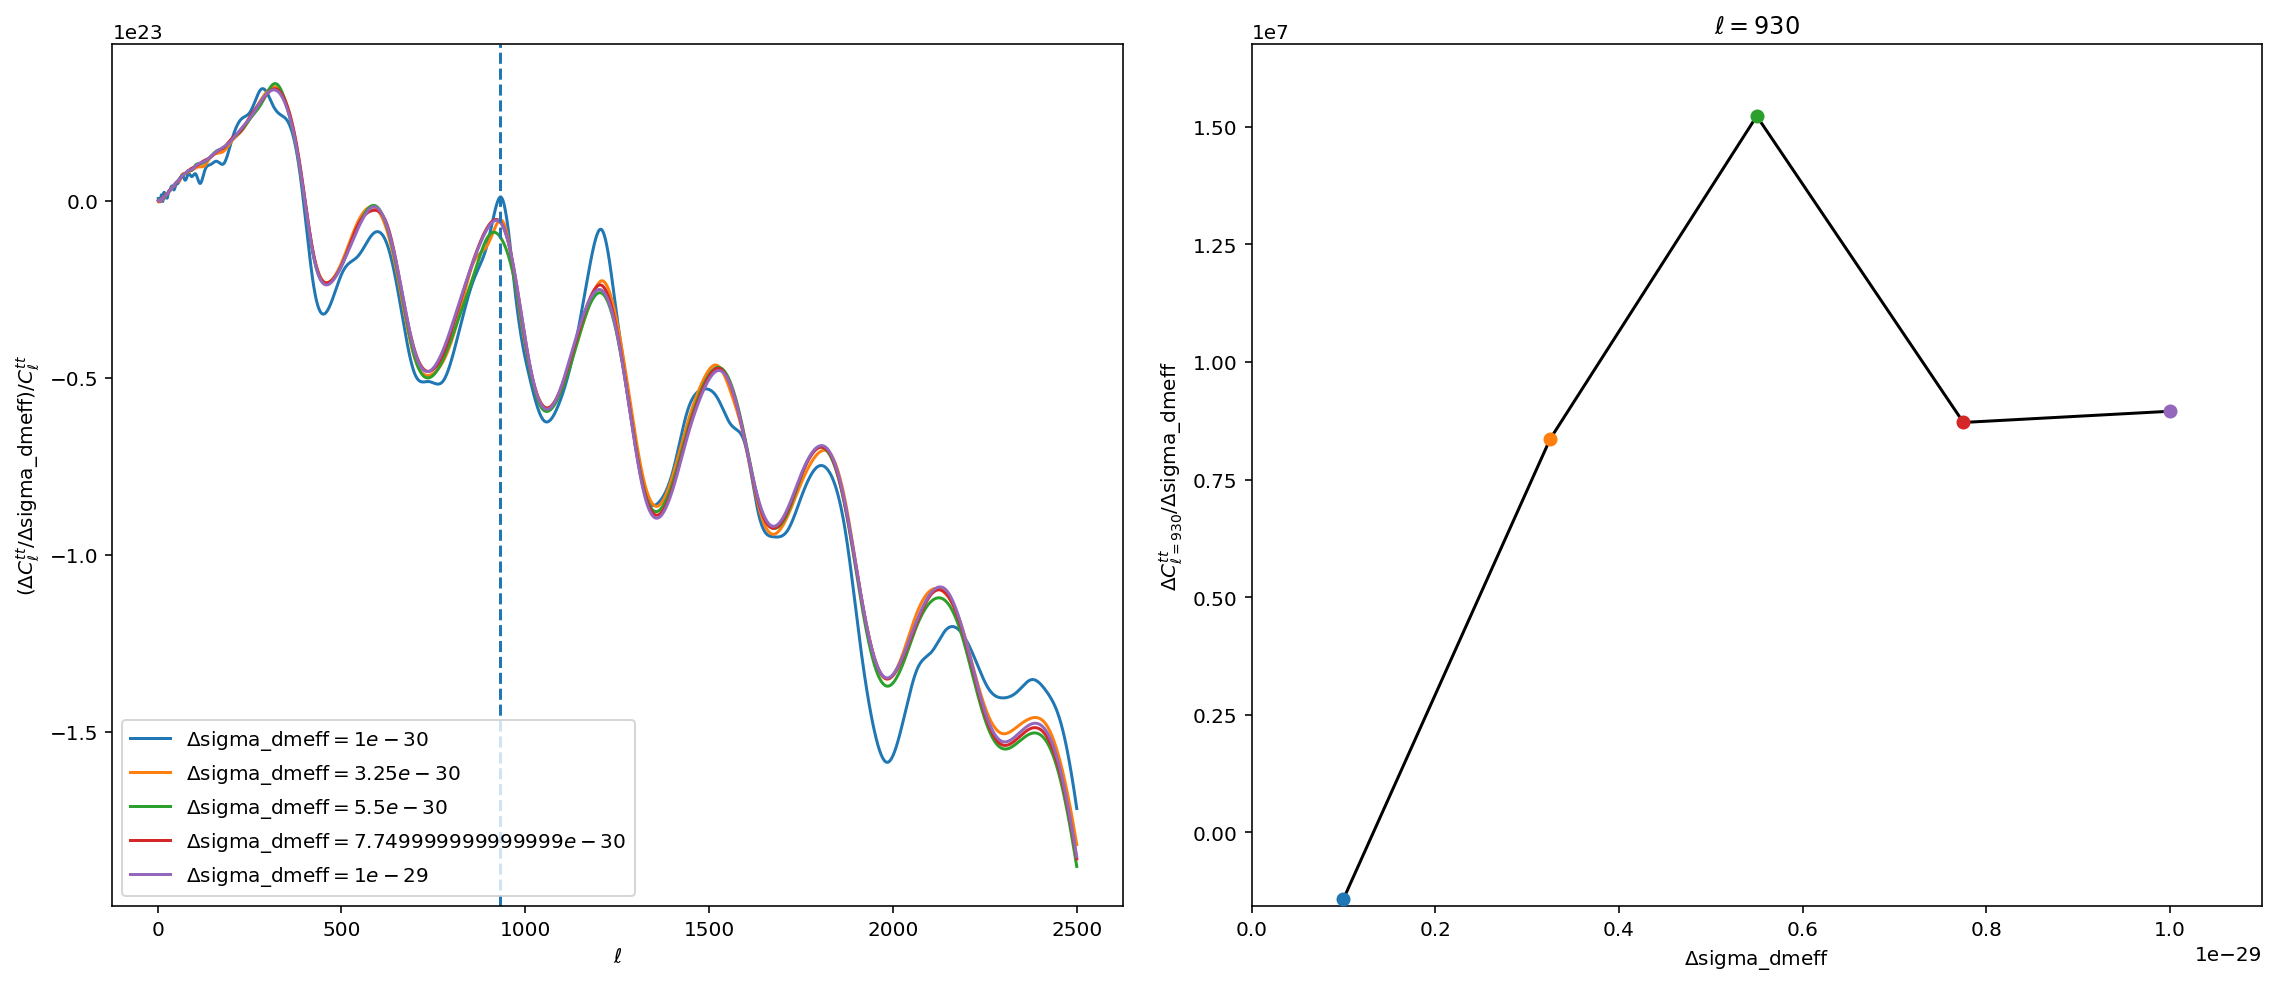

In [6]:
# !hits numerical noise, oscillations
classy_template['m_dmeff'] = 1e-3
classy_template['npow_dmeff'] = 0
# change the size
# in paper 2.6e-26
# in my JP 6.57e-27
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-30, 1e-29, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

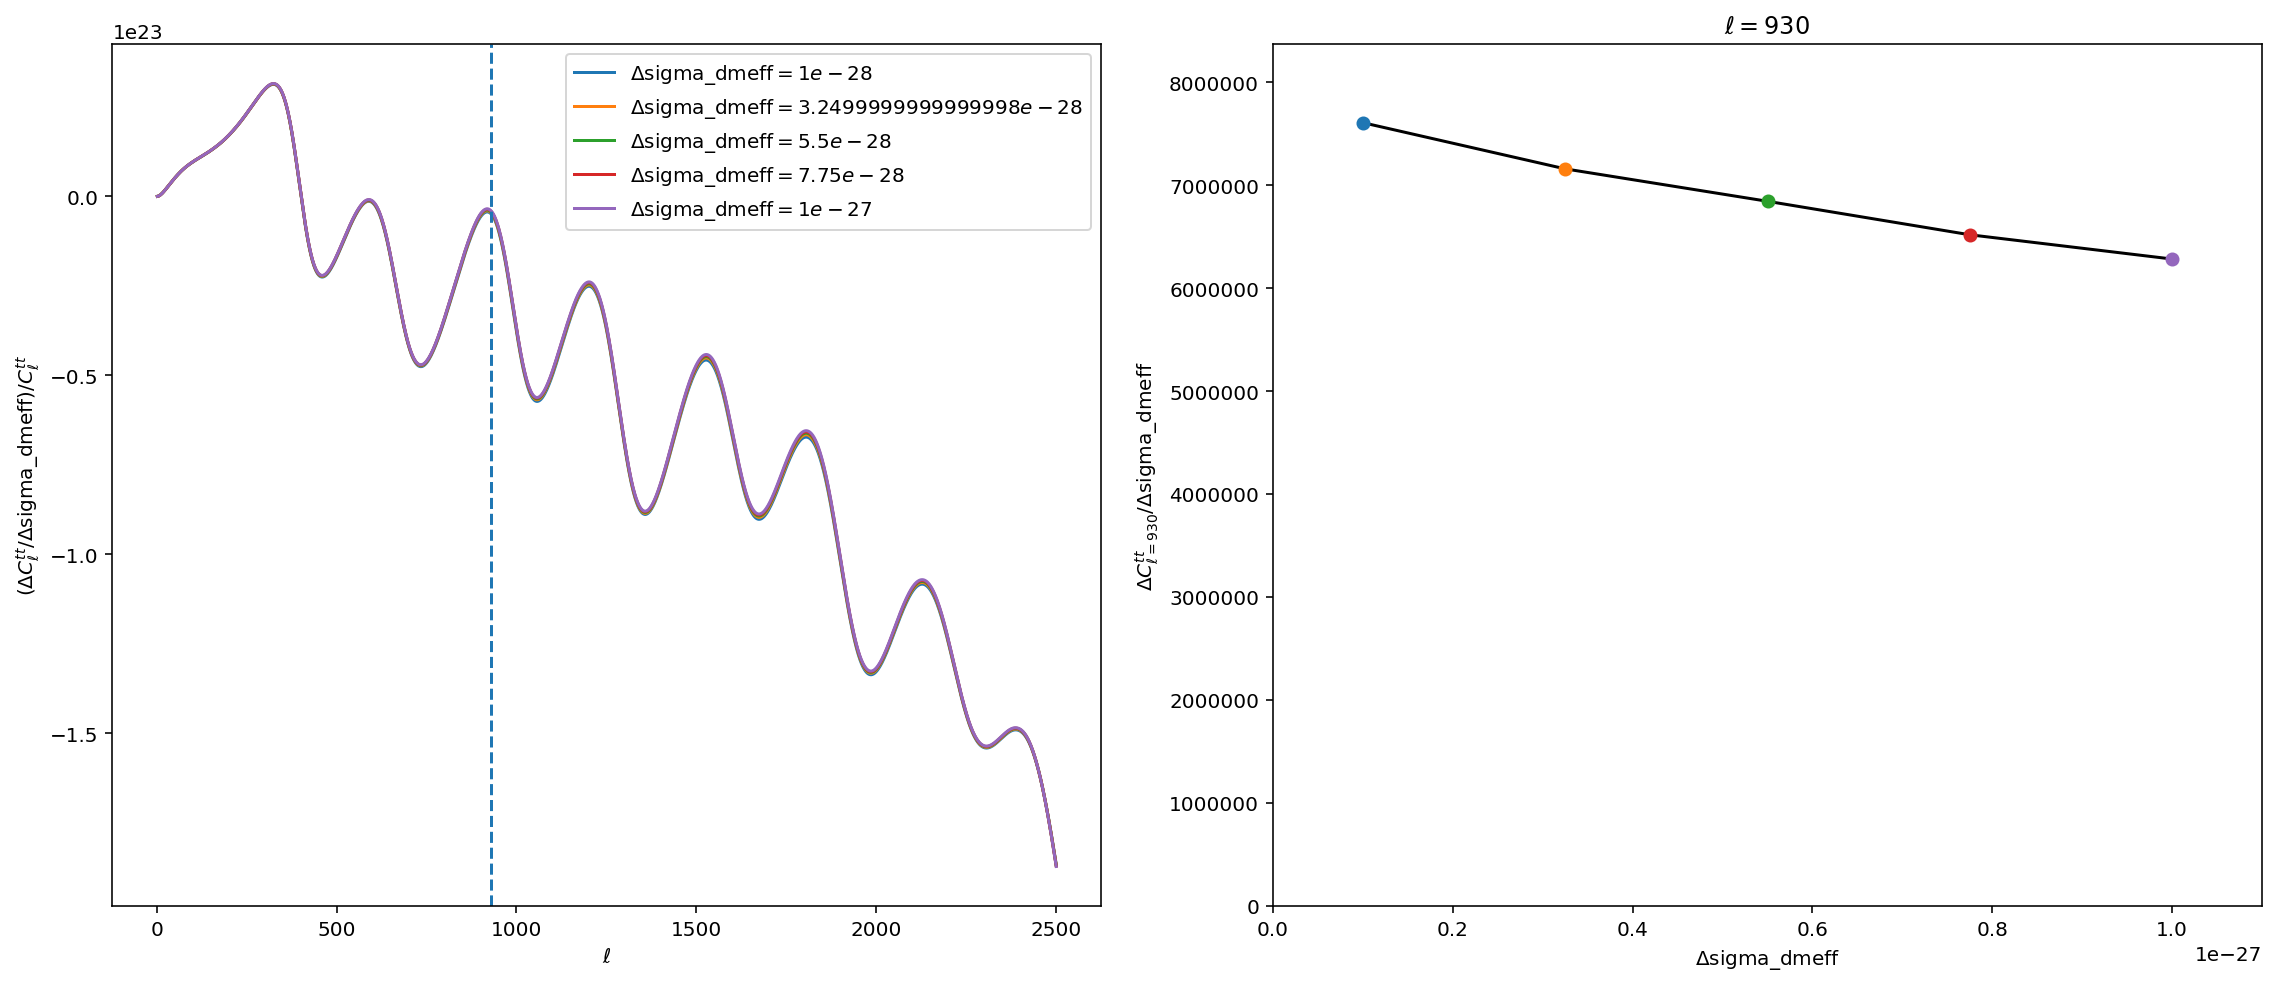

In [7]:
# step size is too large?
classy_template['m_dmeff'] = 1e-3
classy_template['npow_dmeff'] = 0
# change the size
# in paper 2.6e-26
# in my JP 6.57e-27
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-28, 1e-27, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

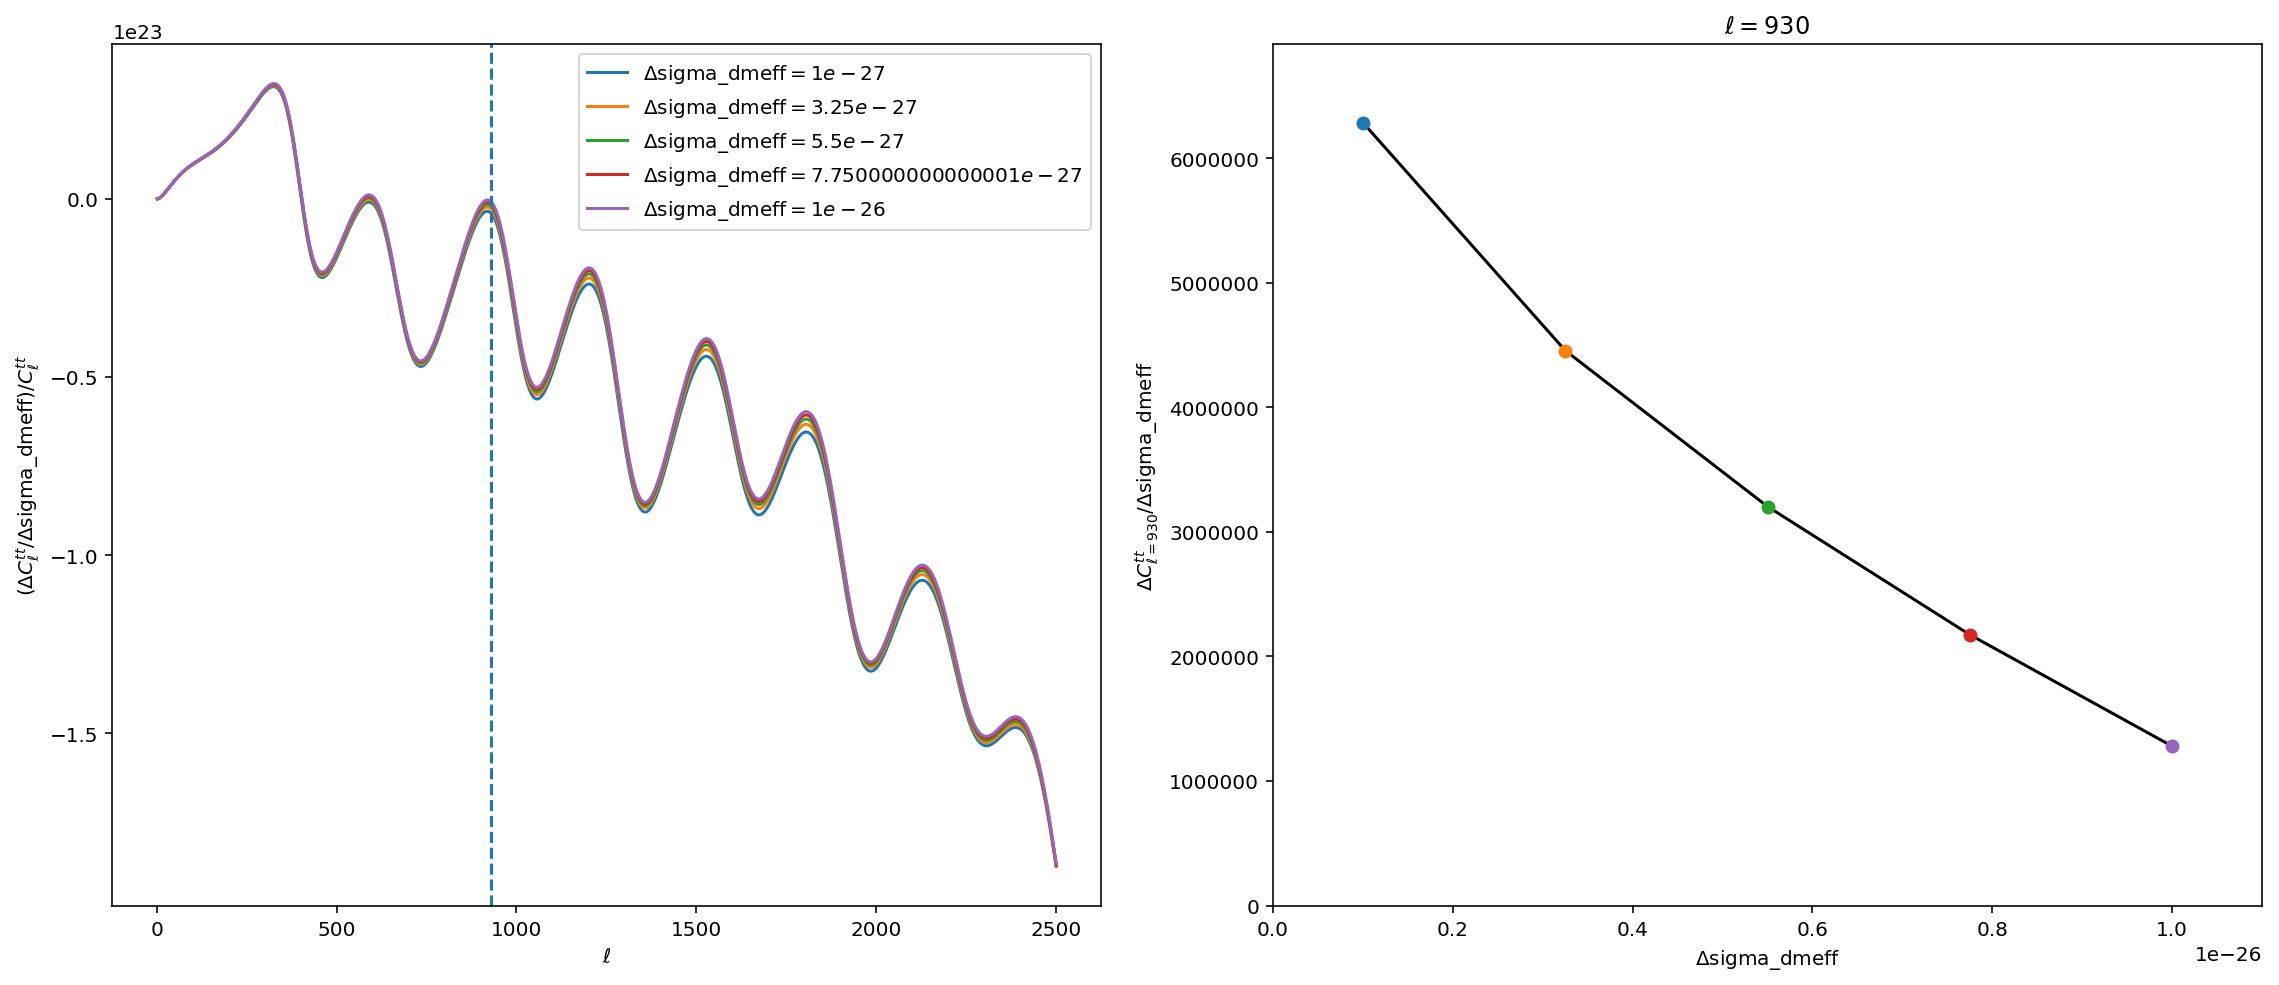

In [8]:
# defintely too large
classy_template['m_dmeff'] = 1e-3
classy_template['npow_dmeff'] = 0
# change the size
# in paper 2.6e-26
# in my JP 6.57e-27
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-27, 1e-26, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

## 1 MeV, n=2

The derivative does not seem to converge very well in general (first two graphs), but its convergence is slightly better in the interval [1e-20, 1e-19] (third graph), which is strange because the limit on $\sigma$ in Vera and Kimberly's paper was on the order of 1e-21.

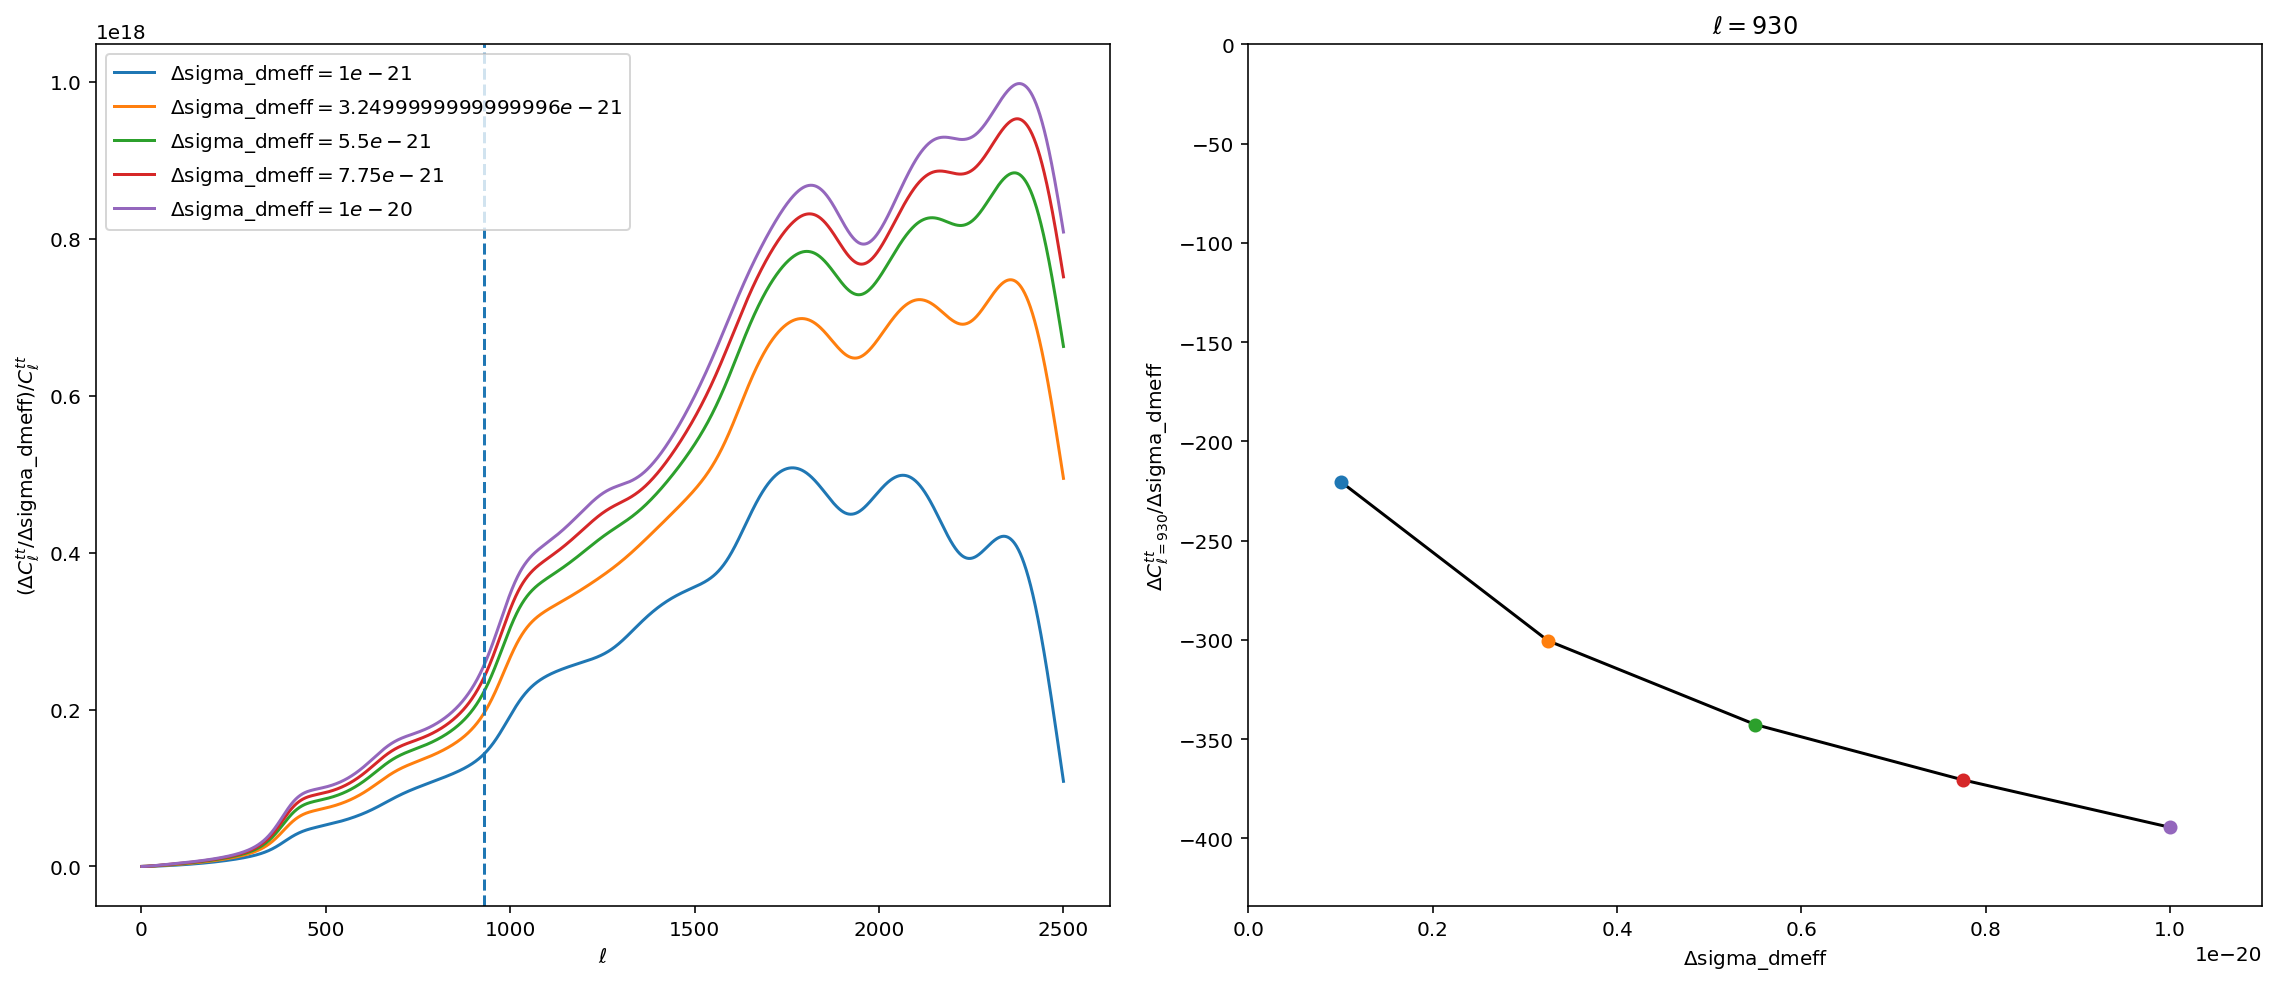

In [9]:
classy_template['m_dmeff'] = 1e-3
classy_template['npow_dmeff'] = 2
# change the size 
# in paper 4.3e-21
# in my JP 6.9e-22
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-21, 1e-20, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

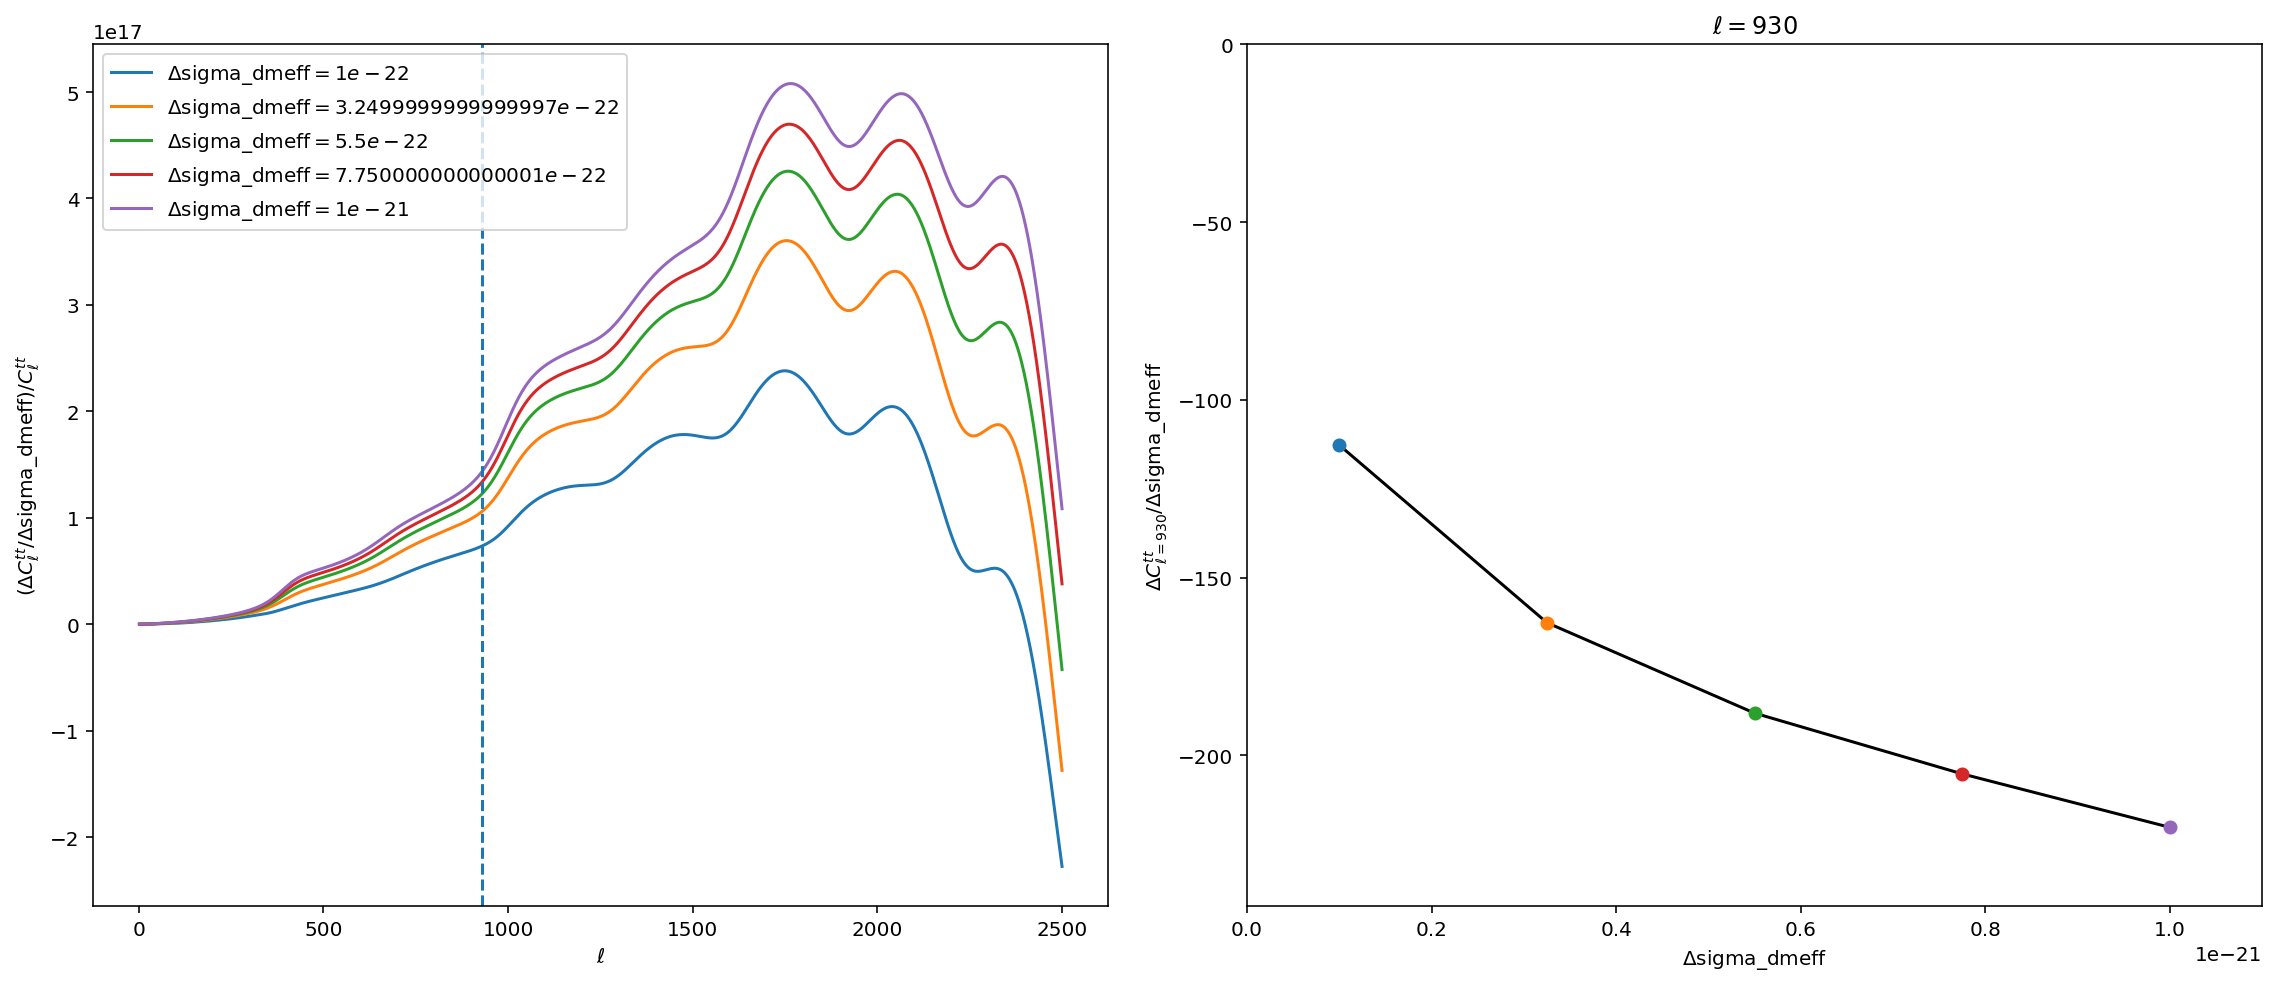

In [10]:
# as we go down in step size, the derivatives diverge to a greater extent
classy_template['m_dmeff'] = 1e-3
classy_template['npow_dmeff'] = 2
# change the size 
# in paper 4.3e-21
# in my JP 6.9e-22
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-22, 1e-21, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

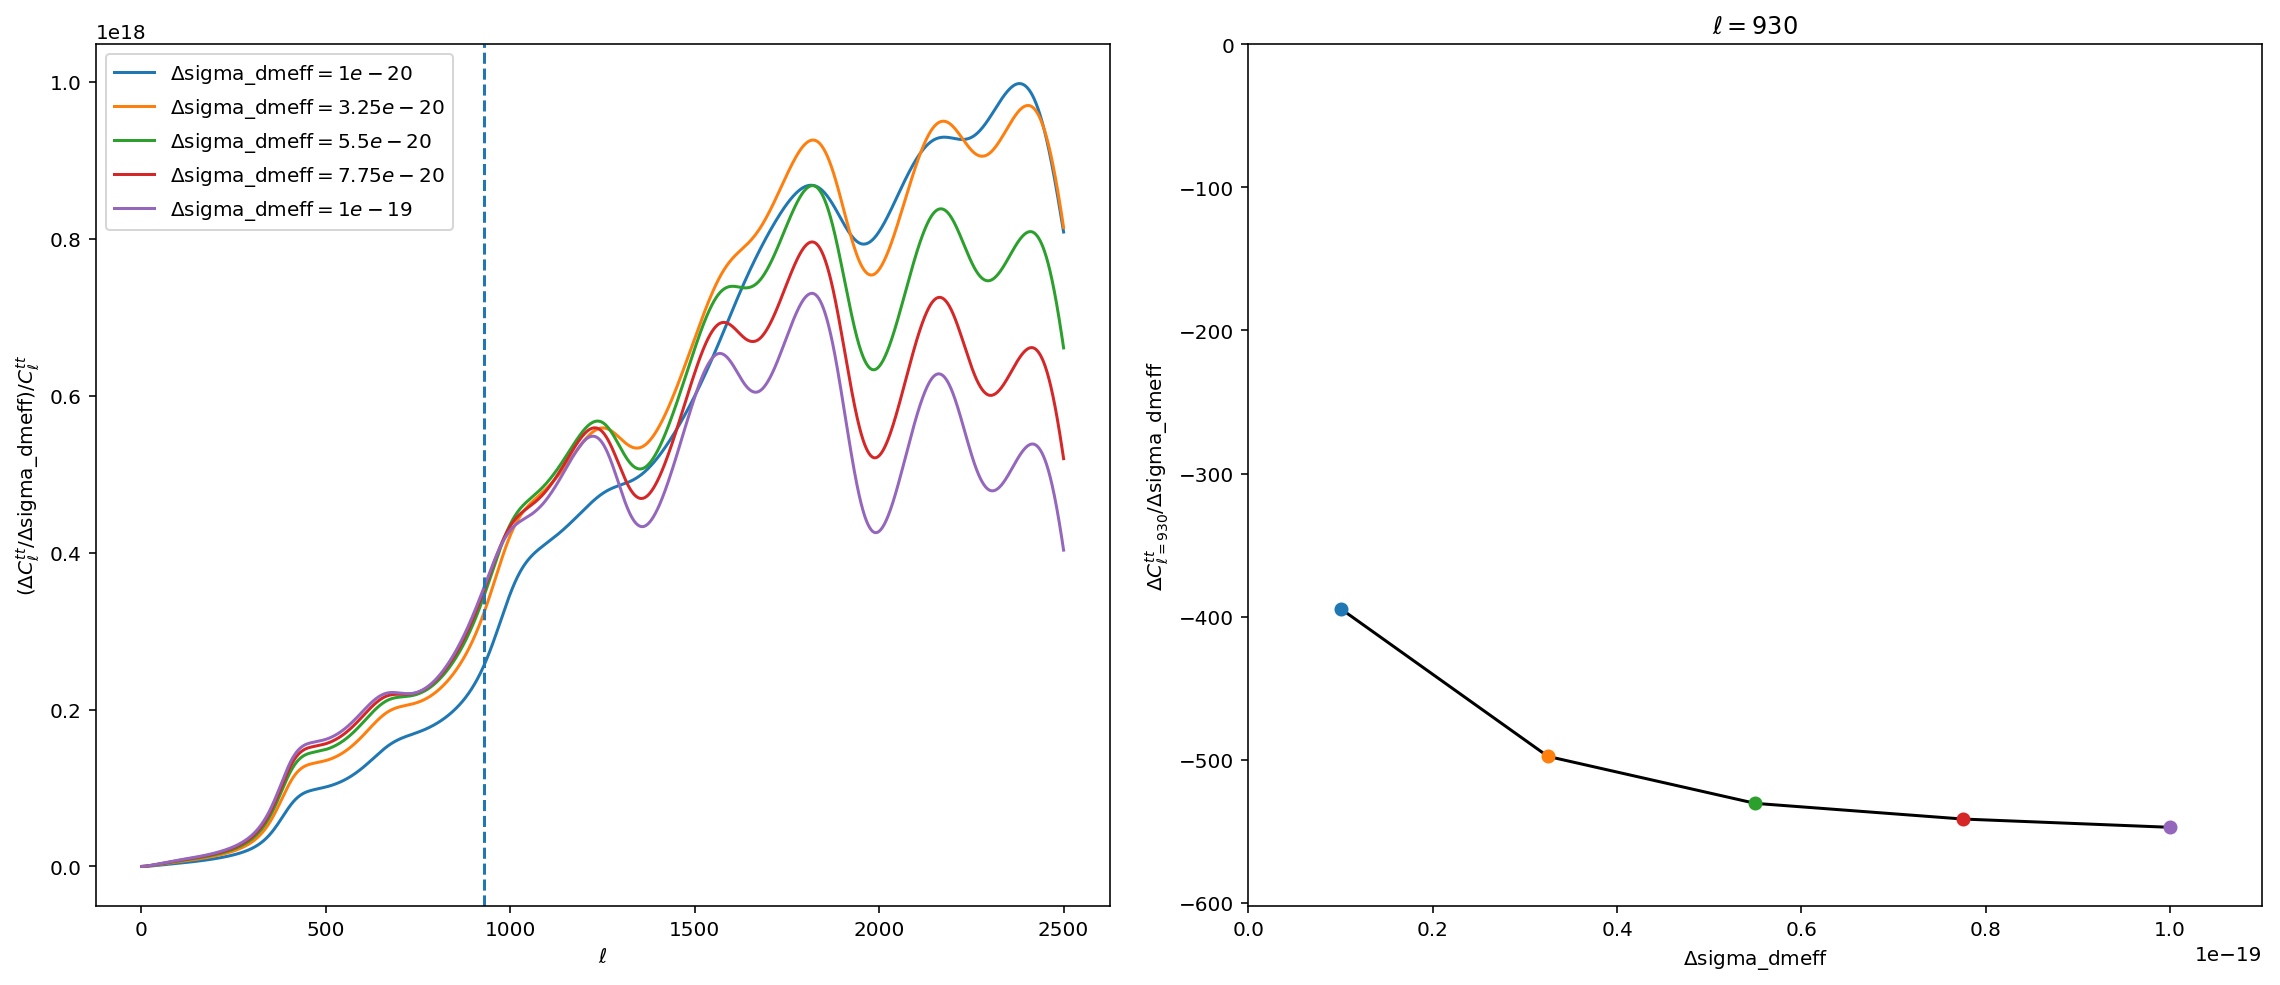

In [11]:
classy_template['m_dmeff'] = 1e-3
classy_template['npow_dmeff'] = 2
# change the size 
# in paper 4.3e-21
# in my JP 6.9e-22
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-20, 1e-19, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

## 1 MeV, n=4
The derivative converges on the interval [1e-17, 1e-16].

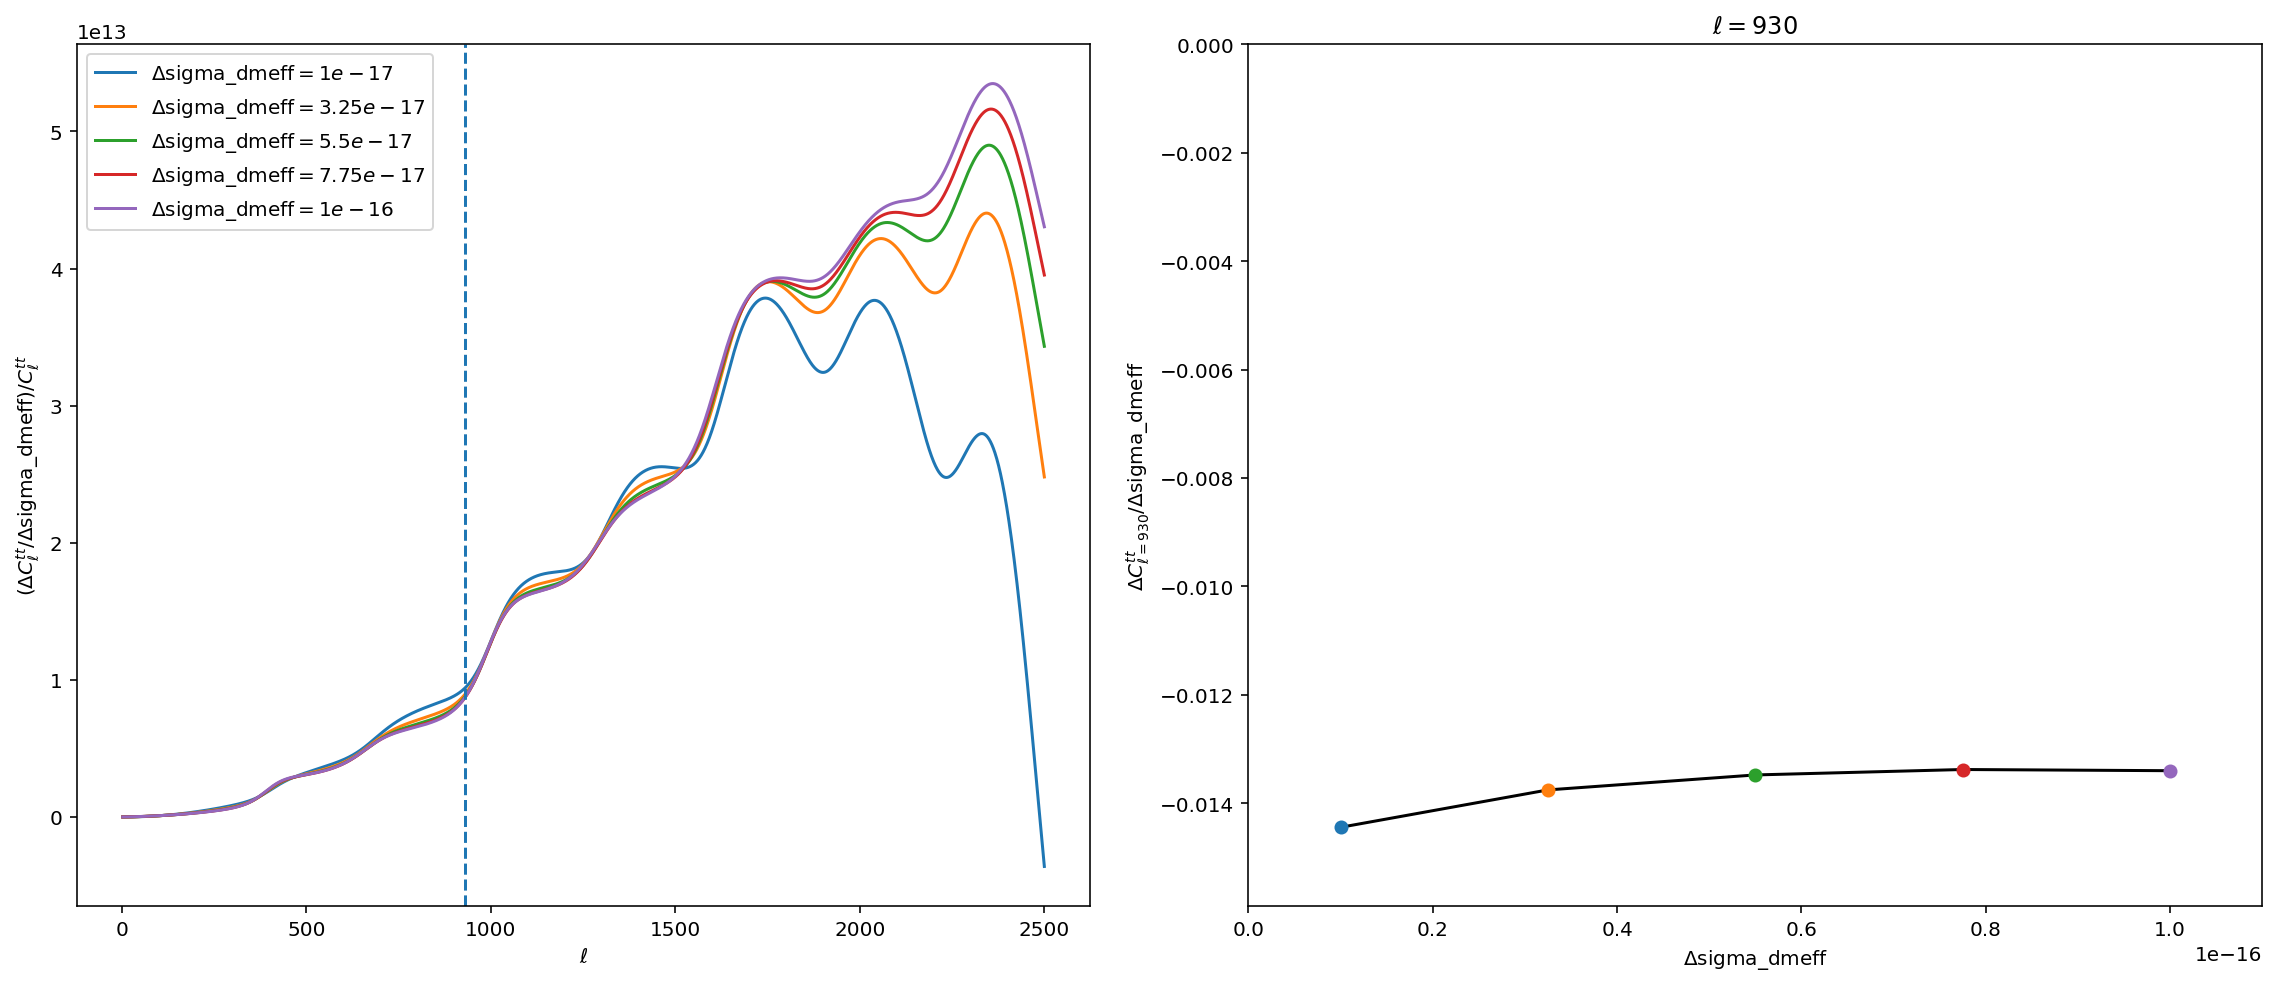

In [12]:
classy_template['m_dmeff'] = 1e-3
classy_template['npow_dmeff'] = 4
# change the size 
# in paper 1.0e-16
# in my JP 3.7e-19
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-17, 1e-16, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

## 1 MeV, n=6
The derivative does not converge on the interval [1e-10, 1e-07], and the code does not finish running for larger values of $\sigma$

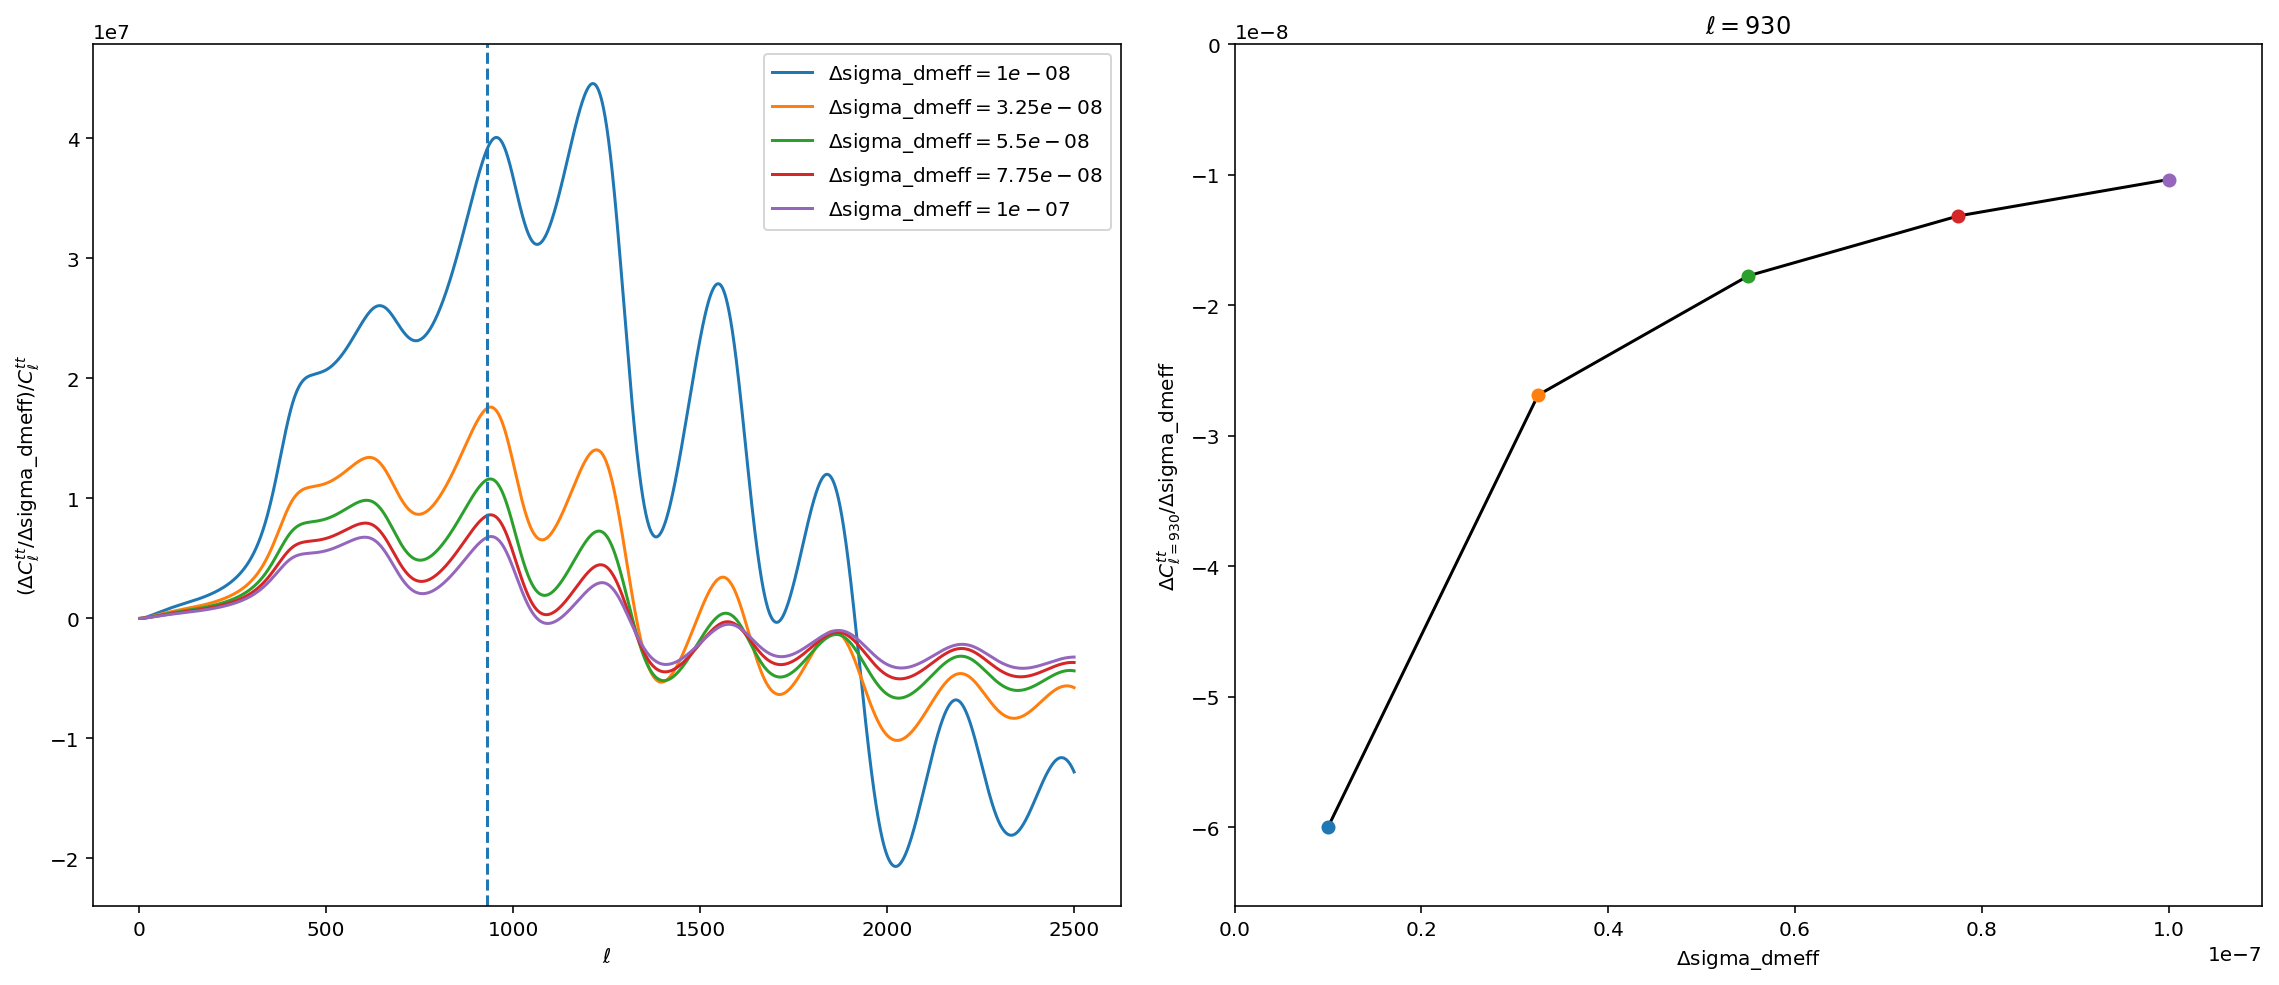

In [13]:
classy_template['m_dmeff'] = 1e-3
classy_template['npow_dmeff'] = 6
# change the size 
# in paper no value given
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-08, 1e-07, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

In [ ]:
# the code would not stop running for this interval
classy_template['m_dmeff'] = 1e-3
classy_template['npow_dmeff'] = 6
# change the size 
# in paper no value given
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-07, 1e-06, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)